In [43]:
13/3

4.333333333333333

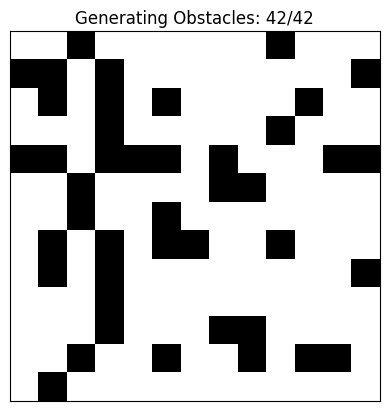

In [39]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
from matplotlib.colors import ListedColormap

# Map dimensions
MAP_WIDTH = 13  # 13x13 matrix

# Function to generate a random map
def generate_random_map_animation(map, ax):
    # Initialize the map with walkable paths (1s)
    map.fill(1)

    # Number of obstacles to create
    number_of_obstacles = (MAP_WIDTH * MAP_WIDTH) // 4  # 25% as obstacles

    # Animation update function
    def update(frame):
        if frame < number_of_obstacles:
            # Randomly select coordinates for obstacles
            x, y = random.randint(0, MAP_WIDTH - 1), random.randint(0, MAP_WIDTH - 1)
            # Ensure that we don't overwrite an existing obstacle (0)
            while map[y][x] == 0:
                x, y = random.randint(0, MAP_WIDTH - 1), random.randint(0, MAP_WIDTH - 1)

            map[y][x] = 0  # Set the cell to obstacle (0)

            # Update the plot data
            ax.clear()
            ax.imshow(map, cmap=ListedColormap(['black', 'white']), vmin=0, vmax=1)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f"Generating Obstacles: {frame + 1}/{number_of_obstacles}")

    return update

# Main execution
def main():
    # Initialize the map array with all walkable paths (1)
    map = np.ones((MAP_WIDTH, MAP_WIDTH), dtype=int)

    # Set up the plot
    fig, ax = plt.subplots()
    ax.imshow(map, cmap=ListedColormap(['black', 'white']), vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Create the animation and assign it to a persistent variable
    ani = animation.FuncAnimation(fig, generate_random_map_animation(map, ax), frames=(MAP_WIDTH * MAP_WIDTH) // 4, interval=100)

    # Save the animation as a GIF
    ani.save("random_map_generation.gif", writer="pillow", fps=10)  # Adjust fps as needed

    # Show the animation
    plt.show()

if __name__ == "__main__":
    main()


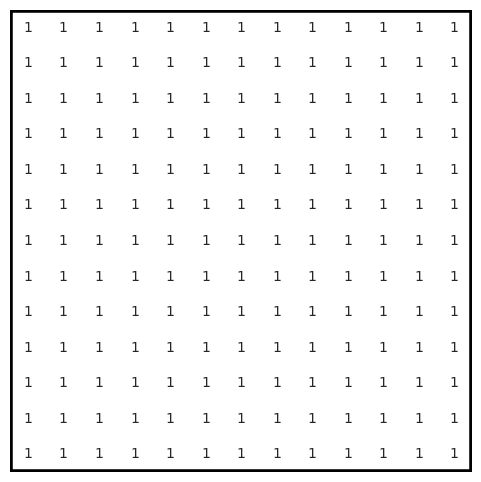

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Generate a 13x13 matrix filled with 1s
matrix = np.ones((13, 13), dtype=int)

# Plot heatmap without internal grid lines
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cmap="binary", cbar=False, square=True, 
            linewidths=0, xticklabels=False, yticklabels=False)

# Add a thicker border around the matrix
ax = plt.gca()
border = patches.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], linewidth=4, 
                           edgecolor='black', facecolor='none')
ax.add_patch(border)

# Hide the axis
plt.axis('off')

# Save and show the plot
plt.savefig("Matrix_with_outer_border.jpg", bbox_inches='tight')
plt.show()


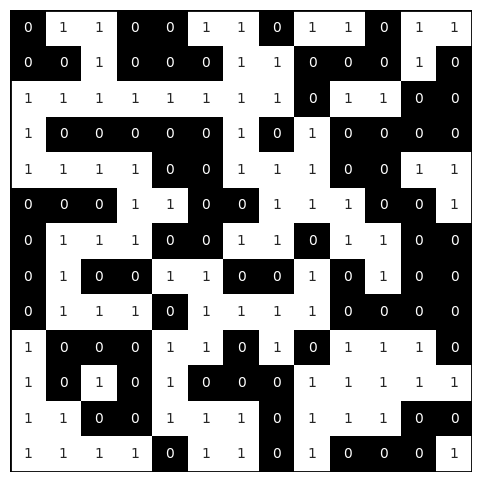

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Generate a 13x13 matrix with random 0s and 1s
matrix = np.random.randint(0, 2, (13, 13))


# Plot heatmap without internal grid lines
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cmap="gray", cbar=False, square=True, 
            linewidths=0, xticklabels=False, yticklabels=False)

# Add a thicker border around the matrix
ax = plt.gca()
border = patches.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], linewidth=2, 
                           edgecolor='black', facecolor='none')
ax.add_patch(border)

# Hide the axis
plt.axis('off')

# Save and show the plot
plt.savefig("Matrix_with_outer_border.jpg")
plt.show()


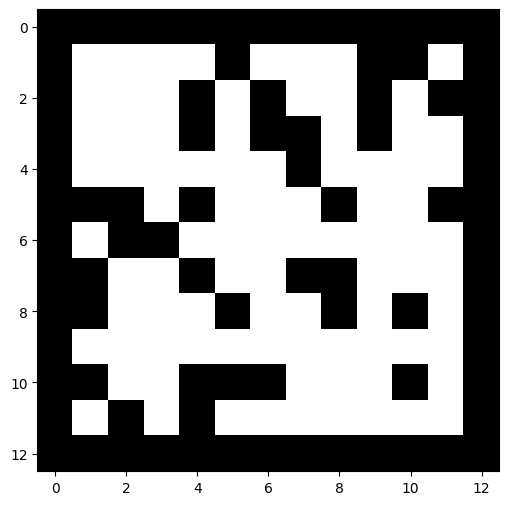

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define a 13x13 matrix for the Bomberman map
# 0 = Wall, 1 = Empty space
map_matrix = np.random.choice([0, 1], size=(13, 13), p=[0.3, 0.7])

# Optional: Make the borders walls
map_matrix[0, :] = map_matrix[-1, :] = 0  # Top and bottom border
map_matrix[:, 0] = map_matrix[:, -1] = 0  # Left and right border

# Define a color map to make 0s and 1s visually distinct
# 0 = Black (wall), 1 = White (empty)
cmap = mcolors.ListedColormap(['black', 'white'])

# Plot the matrix
plt.figure(figsize=(6, 6))
plt.imshow(map_matrix, cmap=cmap, vmin=0, vmax=1)
plt.savefig("Map.jpg")
plt.show()


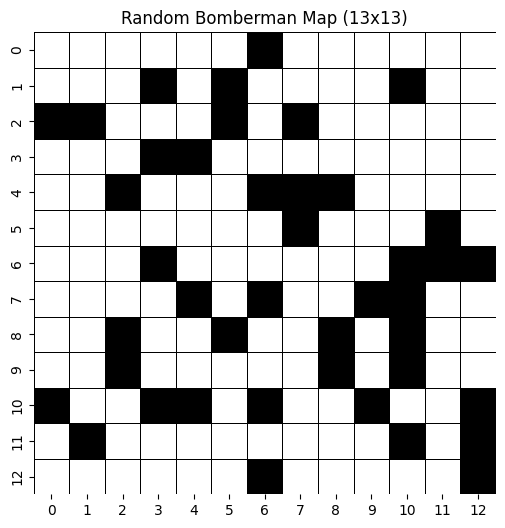

In [15]:
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

def generate_random_map(map_width):
    # Initialize the map with 1s (walkable paths)
    map_grid = [[1 for _ in range(map_width)] for _ in range(map_width)]
    
    # Set 25% of the cells as obstacles
    number_of_obstacles = (map_width * map_width) // 4
    
    # Seed for random number generation
    random.seed(time.time())
    
    for _ in range(number_of_obstacles):
        x = random.randint(0, map_width - 1)
        y = random.randint(0, map_width - 1)
        
        # Ensure that we don't overwrite an existing obstacle
        while map_grid[y][x] == 0:
            x = random.randint(0, map_width - 1)
            y = random.randint(0, map_width - 1)
        
        map_grid[y][x] = 0  # Set the cell to 0 (obstacle)
    
    return map_grid

# Generate a 13x13 map
map_width = 13
random_map = generate_random_map(map_width)

# Visualize the map
plt.figure(figsize=(6, 6))
sns.heatmap(random_map, annot=False, cmap="gray", cbar=False, square=True, linewidths=0.5, linecolor='black')
plt.title("Random Bomberman Map (13x13)")
plt.show()
